<a href="https://colab.research.google.com/github/Meta-Sean/Course-6-Mono/blob/main/6_0002_ps5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

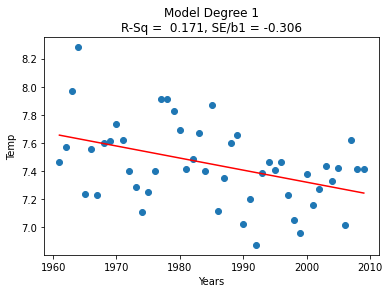

In [28]:
# -*- coding: utf-8 -*-
# Problem Set 5: Experimental Analysis
# Name: 
# Collaborators (discussion):
# Time:

import pylab
import re
import numpy as np


# cities in our weather data
CITIES = [
    'BOSTON',
    'SEATTLE',
    'SAN DIEGO',
    'PHILADELPHIA',
    'PHOENIX',
    'LAS VEGAS',
    'CHARLOTTE',
    'DALLAS',
    'BALTIMORE',
    'SAN JUAN',
    'LOS ANGELES',
    'MIAMI',
    'NEW ORLEANS',
    'ALBUQUERQUE',
    'PORTLAND',
    'SAN FRANCISCO',
    'TAMPA',
    'NEW YORK',
    'DETROIT',
    'ST LOUIS',
    'CHICAGO'
]

TRAINING_INTERVAL = range(1961, 2010)
TESTING_INTERVAL = range(2010, 2016)

"""
Begin helper code
"""
class Climate(object):
    """
    The collection of temperature records loaded from given csv file
    """
    def __init__(self, filename):
        """
        Initialize a Climate instance, which stores the temperature records
        loaded from a given csv file specified by filename.

        Args:
            filename: name of the csv file (str)
        """
        self.rawdata = {}

        f = open(filename, 'r')
        header = f.readline().strip().split(',')
        for line in f:
            items = line.strip().split(',')

            date = re.match('(\d\d\d\d)(\d\d)(\d\d)', items[header.index('DATE')])
            year = int(date.group(1))
            month = int(date.group(2))
            day = int(date.group(3))

            city = items[header.index('CITY')]
            temperature = float(items[header.index('TEMP')])
            if city not in self.rawdata:
                self.rawdata[city] = {}
            if year not in self.rawdata[city]:
                self.rawdata[city][year] = {}
            if month not in self.rawdata[city][year]:
                self.rawdata[city][year][month] = {}
            self.rawdata[city][year][month][day] = temperature
            
        f.close()

    def get_yearly_temp(self, city, year):
        """
        Get the daily temperatures for the given year and city.

        Args:
            city: city name (str)
            year: the year to get the data for (int)

        Returns:
            a 1-d pylab array of daily temperatures for the specified year and
            city
        """
        temperatures = []
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        for month in range(1, 13):
            for day in range(1, 32):
                if day in self.rawdata[city][year][month]:
                    temperatures.append(self.rawdata[city][year][month][day])
        return pylab.array(temperatures)

    def get_daily_temp(self, city, month, day, year):
        """
        Get the daily temperature for the given city and time (year + date).

        Args:
            city: city name (str)
            month: the month to get the data for (int, where January = 1,
                December = 12)
            day: the day to get the data for (int, where 1st day of month = 1)
            year: the year to get the data for (int)

        Returns:
            a float of the daily temperature for the specified time (year +
            date) and city
        """
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        assert month in self.rawdata[city][year], "provided month is not available"
        assert day in self.rawdata[city][year][month], "provided day is not available"
        return self.rawdata[city][year][month][day]

def se_over_slope(x, y, estimated, model):
    """
    For a linear regression model, calculate the ratio of the standard error of
    this fitted curve's slope to the slope. The larger the absolute value of
    this ratio is, the more likely we have the upward/downward trend in this
    fitted curve by chance.
    
    Args:
        x: an 1-d pylab array with length N, representing the x-coordinates of
            the N sample points
        y: an 1-d pylab array with length N, representing the y-coordinates of
            the N sample points
        estimated: an 1-d pylab array of values estimated by a linear
            regression model
        model: a pylab array storing the coefficients of a linear regression
            model

    Returns:
        a float for the ratio of standard error of slope to slope
    """
    assert len(y) == len(estimated)
    assert len(x) == len(estimated)
    EE = ((estimated - y)**2).sum()
    var_x = ((x - x.mean())**2).sum()
    SE = pylab.sqrt(EE/(len(x)-2)/var_x)
    return SE/model[0]

"""
End helper code
"""

def generate_models(x, y, degs):
    """
    Generate regression models by fitting a polynomial for each degree in degs
    to points (x, y).

    Args:
        x: an 1-d pylab array with length N, representing the x-coordinates of
            the N sample points
        y: an 1-d pylab array with length N, representing the y-coordinates of
            the N sample points
        degs: a list of degrees of the fitting polynomial

    Returns:
        a list of pylab arrays, where each array is a 1-d array of coefficients
        that minimizes the squared error of the fitting polynomial
    """
    # list of coefficeients
    coef = []
    # use polyfit on the x,y-coords for each deg
    for deg in degs:
      coef.append(np.polyfit(x,y,deg))
    return coef 


def r_squared(y, estimated):
    """
    Calculate the R-squared error term.
    
    Args:
        y: 1-d pylab array with length N, representing the y-coordinates of the
            N sample points
        estimated: an 1-d pylab array of values estimated by the regression
            model

    Returns:
        a float for the R-squared error term
    """
    estimateError = ((estimated - y)**2).sum()
    meanOfMeasure = sum(y) / len(y)
    variability = ((y - meanOfMeasure)**2).sum()
    return 1 - estimateError/variability


def evaluate_models_on_training(x, y, models):
    """
    For each regression model, compute the R-squared value for this model with the
    standard error over slope of a linear regression line (only if the model is
    linear), and plot the data along with the best fit curve.

    For the plots, you should plot data points (x,y) as blue dots and your best
    fit curve (aka model) as a red solid line. You should also label the axes
    of this figure appropriately and have a title reporting the following
    information:
        degree of your regression model,
        R-square of your model evaluated on the given data points,
        and SE/slope (if degree of this model is 1 -- see se_over_slope). 

    Args:
        x: an 1-d pylab array with length N, representing the x-coordinates of
            the N sample points
        y: an 1-d pylab array with length N, representing the y-coordinates of
            the N sample points
        models: a list containing the regression models you want to apply to
            your data. Each model is a pylab array storing the coefficients of
            a polynomial.

    Returns:
        None
    """
    for model in models:
      pylab.xlabel("Years")
      pylab.ylabel("Temp")
      pylab.plot(x, y, 'o', label = 'Data')
      degs = len(model) - 1
      estimates = pylab.polyval(model, x)
      # Compute R-squared for each model
      r_sq = r_squared(y, estimates)
      # if linear include SE
      if degs == 1:
        se_ratio = se_over_slope(x, y, estimates, model)
        title = "Model Degree {}\nR-Sq =  {:.3f}, SE/b1 = {:.3f}".format(degs, r_sq, se_ratio)
      else:
        title = "Model Degree {}\nR-Sq = {:.3f}".format(degs, r_sq)
      # Generate plot
      pylab.plot(x, estimates, 'r-')
      pylab.title(title)
      pylab.show()

def gen_cities_avg(climate, multi_cities, years):
    """
    Compute the average annual temperature over multiple cities.

    Args:
        climate: instance of Climate
        multi_cities: the names of cities we want to average over (list of str)
        years: the range of years of the yearly averaged temperature (list of
            int)

    Returns:
        a pylab 1-d array of floats with length = len(years). Each element in
        this array corresponds to the average annual temperature over the given
        cities for a given year.
    """
    avg_annual_temp = pylab.array([0.0 for year in years])
    for city in multi_cities:
      city_annual_temp = pylab.array([climate.get_yearly_temp(city, year).mean() for year in years])
      avg_annual_temp += city_annual_temp
    return avg_annual_temp / len(multi_cities)


def moving_average(y, window_length):
    """
    Compute the moving average of y with specified window length.

    Args:
        y: an 1-d pylab array with length N, representing the y-coordinates of
            the N sample points
        window_length: an integer indicating the window length for computing
            moving average

    Returns:
        an 1-d pylab array with the same length as y storing moving average of
        y-coordinates of the N sample points
    """
    mv_avgs = []
    for i in range(len(y)):
        # Dealing with edge cases at beginning
        if (i - window_length + 1) <= 0:
            first_index = 0
        else:
            first_index = i - window_length + 1
        last_index = i + 1
        mv_avg = pylab.mean(y[first_index:last_index])
        mv_avgs.append(mv_avg)
    return mv_avgs

def rmse(y, estimated):
    """
    Calculate the root mean square error term.

    Args:
        y: an 1-d pylab array with length N, representing the y-coordinates of
            the N sample points
        estimated: an 1-d pylab array of values estimated by the regression
            model

    Returns:
        a float for the root mean square error term
    """
    # RMSE = sqrt(sum(y_i-e_i)*/n)
    return math.sqrt(sum((y-estimated)**2)/len(y))
    

def gen_std_devs(climate, multi_cities, years):
    """
    For each year in years, compute the standard deviation over the averaged yearly
    temperatures for each city in multi_cities. 

    Args:
        climate: instance of Climate
        multi_cities: the names of cities we want to use in our std dev calculation (list of str)
        years: the range of years to calculate standard deviation for (list of int)

    Returns:
        a pylab 1-d array of floats with length = len(years). Each element in
        this array corresponds to the standard deviation of the average annual 
        city temperatures for the given cities in a given year.
    """
    std_annual_temp = pylab.array([0.0 for year in years])
    for city in multi_cities:
      city_annual_std = pylab.array([climate.get_yearly_temp(city, year).std() for year in years])
      std_annual_temp += city_annual_std
    return std_annual_temp / len(multi_cities)
    # Calculate a temperature for each day in that year, by averaging the temps across the cities
    # Take the std of the daily averages for the whole year  

def evaluate_models_on_testing(x, y, models):

    """
    For each regression model, compute the RMSE for this model and plot the
    test data along with the model’s estimation.

    For the plots, you should plot data points (x,y) as blue dots and your best
    fit curve (aka model) as a red solid line. You should also label the axes
    of this figure appropriately and have a title reporting the following
    information:
        degree of your regression model,
        RMSE of your model evaluated on the given data points. 

    Args:
        x: an 1-d pylab array with length N, representing the x-coordinates of
            the N sample points
        y: an 1-d pylab array with length N, representing the y-coordinates of
            the N sample points
        models: a list containing the regression models you want to apply to
            your data. Each model is a pylab array storing the coefficients of
            a polynomial.

    Returns:
        None
    """
    for model in models:
      pylab.xlabel("Years")
      pylab.ylabel("Temp")
      pylab.plot(x, y, 'o', label = 'Data')
      degs = len(model) - 1
      estimates = pylab.polyval(model, x)
      # Compute RMSE for each model
      rmse_val = rmse(y, estimates)
      # if linear include SE
      title = "Model Degree {}\RMSE = {:.3f}".format(degs, rmse_val)
      # Generate plot
      pylab.plot(x, estimates, 'r-')
      pylab.title(title)
      pylab.show()



if __name__ == '__main__':

    pass 

    # Part A.4
    # degs = [1,2,3]
    # data_samples = Climate('data.csv')
    # x = pylab.array(TRAINING_INTERVAL)
    # # y = pylab.array([data_samples.get_daily_temp('NEW YORK', 1, 10, year) for year in TRAINING_INTERVAL])
    # # models = generate_models(x, y, degs)
    # # evaluate_models_on_training(x, y, models)

    # # y_year = pylab.array([data_samples.get_yearly_temp('NEW YORK', year).mean() for year in TRAINING_INTERVAL])
    # # models = generate_models(x, y_year, degs)
    # # evaluate_models_on_training(x, y_year, models)


    # # Part B
    # # print("Starting Part B")
    # # y = gen_cities_avg(data_samples, CITIES, TRAINING_INTERVAL)
    # # models = generate_models(x, y, degs)
    # # evaluate_models_on_training(x, y, models)

    
    # # Part C
    # print("Starting Part C")
    # y = moving_average(gen_cities_avg(data_samples, CITIES, TRAINING_INTERVAL),
    #        5)
    # models = generate_models(x, y, degs)
    # evaluate_models_on_training(x, y, models)

    # Part D.2
    # Predict future with 2010-2015 TESTING_INTERVAL
    # degs = [1,2,20]
    # data_samples = Climate('data.csv')
    # # 5-year moving averages of the national yearly temperature form 1961-2009 as your training samples
    # x = pylab.array(TRAINING_INTERVAL)
    # y = moving_average(gen_cities_avg(data_samples, CITIES, TRAINING_INTERVAL), 5)
    # # Fit the samples to poly nomials of degree 1, 2, and 20
    # models = generate_models(x, y, degs)
    # # use evaluate_models_on_training to plot your fitting results
    # evaluate_models_on_testing(x, y, models)
    # test = pylab.array(TESTING_INTERVAL)
    # train = gen_cities_avg(data_samples, CITIES, TESTING_INTERVAL)
    # evaluate_models_on_testing(test, train, models)

    # Part E
    # TODO: replace this line with your code
    climate = Climate('data.csv')
    years = pylab.array(TRAINING_INTERVAL)
    result = gen_std_devs(climate, CITIES, years)
    ma = moving_average(result, 5)
    models = generate_models(years, ma, [1])
    evaluate_models_on_training(years, result, models)
  


In [22]:
import unittest 
import pylab
import math


class TestPS5(unittest.TestCase):

	def test_generate_models(self):

		degs_msg = "generate_models should return one model for each given degree"
		list_type_msg = "generate_models should return a list of models"
		array_type_msg = "each model returned by generate_models should be of type pylab.array"
		coefficient_mismatch = "coefficients of returned model are not as expected"

		# simple y = x case. 
		x = pylab.array(range(50))
		y = pylab.array(range(50))
		degrees = [1]
		models = generate_models(x, y, degrees)

		self.assertEquals(len(models), len(degrees), degs_msg)
		self.assertIsInstance(models, list, list_type_msg)
		self.assertIsInstance(models[0], pylab.ndarray, array_type_msg)
		self.assertListEqual(list(models[0]), list(pylab.polyfit(x, y, 1)), coefficient_mismatch)

		# two models for y = 2x case 
		y = pylab.array(range(0,100,2))
		degrees = [1, 2]
		models = generate_models(x, y, degrees)
		self.assertEquals(len(models), len(degrees), degs_msg)
		self.assertIsInstance(models, list, list_type_msg)
		for m in models:
			self.assertIsInstance(m, pylab.ndarray, array_type_msg)
		for i in range(2):
			self.assertListEqual(list(models[i]), list(pylab.polyfit(x,y, degrees[i])), coefficient_mismatch)

		# three models 
		degrees = [1,2,20]
		models = generate_models(x, y, degrees)
		self.assertEquals(len(models), len(degrees), degs_msg)
		self.assertIsInstance(models, list, list_type_msg)
		for m in models:
			self.assertIsInstance(m, pylab.ndarray, array_type_msg)
		for i in range(3):
			self.assertListEqual(list(models[i]), list(pylab.polyfit(x,y, degrees[i])), coefficient_mismatch)

		
	def test_r_squared(self):

		# basic case:
		# actual values    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
		# estimated values [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
		y = pylab.array(range(10))
		est = pylab.array([5]*10)
		r_sq = r_squared(y, est)
		self.assertIsInstance(r_sq, float, "r_squared should return a float")
		rounded = round(r_sq, 6)
		self.assertEquals(rounded, -0.030303)

		# another basic case:
		# actual values    [0, 1, 2, 3, 4, 5, 6, 7, 8]
		# estimated values [0, 2, 4, 6, 8, 10, 12, 14, 16]
		est = pylab.array(range(0,20,2))
		r_sq = r_squared(y, est)
		self.assertIsInstance(r_sq, float, "r_squared should return a float")
		rounded = round(r_sq, 6)
		self.assertEquals(rounded, -2.454545)

		# case where actual = estimated, so R^2=1
		r_sq = r_squared(y, y)
		self.assertIsInstance(r_sq, float, "r_squared should return a float")
		self.assertEquals(r_sq, 1.0)

	def test_gen_cities_avg(self):
		# test for just one city
		climate = Climate('data.csv')
		test_years = pylab.array(TESTING_INTERVAL)
		result = gen_cities_avg(climate, ['SEATTLE'], test_years)
		correct = [11.514383561643836,10.586849315068493,11.28319672,12.10643836,12.82917808,13.13178082]
		self.assertTrue(len(correct) == len(result), "Expected length %s, was length %s" % (len(correct), len(result)))

		for index in range(len(correct)):
			good_enough = math.isclose(correct[index], result[index])
			self.assertTrue(good_enough, "City averages do not match expected results")

		# multiple cities
		result = gen_cities_avg(climate, CITIES, test_years)
		correct = [16.75950424, 16.85749511,17.56180068,16.65717547,16.84499022,17.54460535]
		self.assertTrue(len(correct) == len(result), "Expected length %s, was length %s" % (len(correct), len(result)))

		for index in range(len(correct)):
			good_enough = math.isclose(correct[index], result[index])
			self.assertTrue(good_enough, "City averages do not match expected results")

		# years range
		# multiple cities
		result = gen_cities_avg(climate, ['TAMPA', 'DALLAS'], test_years)
		correct = [20.8040411,22.03910959,22.27206284,21.31136986,20.88123288,22.07794521]
		self.assertTrue(len(correct) == len(result), "Expected length %s, was length %s" % (len(correct), len(result)))

		for index in range(len(correct)):
			good_enough = math.isclose(correct[index], result[index])
			self.assertTrue(good_enough, "City averages do not match expected results")

	def test_moving_avg(self):
		y = [1, 2, 3, 4, 5, 6, 7]
		window_length = 3
		correct = pylab.array([1, 1.5, 2, 3, 4, 5, 6])
		result = moving_average(y, window_length)
		self.assertListEqual(list(result), list(correct), "Moving average values incorrect")

		y = [-1.5, 1.5, -3.0, 3.0, -4.5, 4.5]
		window_length = 2
		correct = [-1.5, 0, -.75, 0, -.75, 0]
		result = moving_average(y, window_length)
		self.assertListEqual(list(result), list(correct), "Moving average values incorrect")

	def test_rmse(self):
		y = [1, 2, 3, 4, 5, 6, 7, 8, 9]
		estimate = [1, 4, 9, 16, 25, 36, 49, 64, 81]
		result = rmse(pylab.array(y), pylab.array(estimate))
		correct = 35.8515457593
		self.assertTrue(math.isclose(correct, result), "RMSE value incorrect")

		y = [1, 1, 1, 1, 1, 1, 1, 1, 1]
		estimate = [1, 4, 9, 16, 25, 36, 49, 64, 81]
		result = rmse(pylab.array(y), pylab.array(estimate))
		correct = 40.513372278
		self.assertTrue(math.isclose(correct, result), "RMSE value incorrect")

	def test_gen_std_devs(self):
		climate = Climate('data.csv')
		years = pylab.array(TRAINING_INTERVAL)
		result = gen_std_devs(climate, ['SEATTLE'], years)
		correct = [6.1119325255476635, 5.4102625076401125, 6.0304210441394801, 5.5823239710637846, 5.5908151965372177, 5.0347634736031583, 6.2485081784971772, 5.6752637253518703, 5.9822493041266327, 5.5376216719090898, 6.0339331562285095, 6.3471434661632733, 5.3872564859222782, 5.7528361897357705, 6.0117329392620285, 5.5922579610955854, 5.67888175212234, 5.7810899373043272, 5.7184178577664087, 5.3955809402004036, 5.1736886920193665, 5.8134229790176573, 5.1915733214759872, 5.4023314139519591, 6.7868442109830855, 5.2952870947334114, 5.6064597624296333, 5.4921097908102086, 6.1450202825415214, 6.3591021848005278, 5.4996866353350615, 5.6516820894310058, 5.7969983303071411, 5.8531227958031931, 5.2545492072097808, 6.0102701017450126, 5.5327493838092865, 5.7703034605336532, 5.0412624972468443, 5.2728662938897264, 5.0859211734722649, 5.5526426823734987, 5.8005720594546748, 5.7391426965165389, 5.5518538235632207, 5.8279562142168073, 5.9089508390885479, 5.9789908401877394, 6.5696153940105573]
		self.assertTrue(len(correct) == len(result), "Expected length %s, was length %s" % (len(correct), len(result)))

		for index in range(len(correct)):
			good_enough = math.isclose(correct[index], result[index])
			self.assertTrue(good_enough, "Standard deviations do not match expected results")

		result = gen_std_devs(climate, CITIES, years)
		correct = [6.8007729489975439, 6.9344723094071865, 7.2965004501815818, 6.8077243598168549, 6.5055948680511539, 6.959087494608867, 6.4889799240243695, 6.9510430337868963, 7.0585431115159478, 7.0977420580318782, 6.8386579785236048, 6.731347077523127, 6.6616225764762902, 6.4092396746786013, 6.6214217100011084, 6.7136104957814435, 7.2575482189983553, 7.263276360210706, 7.1787611973720633, 7.0859352578611796, 6.8736741252762821, 6.7957043866857889, 7.0815549177622765, 6.7249974778654433, 7.2162729580931124, 6.4560372283957266, 6.7288306794528907, 6.9720986945202927, 6.922958341746317, 6.3033645588306086, 6.5330170805999908, 6.2777429551963237, 6.8488629387504032, 6.8257830274740625, 6.7856101061465059, 6.7592782215870484, 6.6634050127541604, 6.4486321701001552, 6.3413248952817742, 6.7637674361128752, 6.5519930751275384, 6.6831654464946064, 6.7751550280705839, 6.7435411127318146, 6.8720508861149154, 6.381528250607194, 6.9707944558310109, 6.7582457290380731, 6.7451346848899991]
		self.assertTrue(len(correct) == len(result), "Expected length %s, was length %s" % (len(correct), len(result)))

		for index in range(len(correct)):
			good_enough = math.isclose(correct[index], result[index])
			self.assertTrue(good_enough, "Standard deviations do not match expected results")

		result = gen_std_devs(climate, ['TAMPA', 'DALLAS'], years)
		correct = [6.6222742584336203, 7.0831603561201613, 7.7597469401129215, 7.0259613619453818, 6.5638542892147722, 7.2251974365928691, 6.1518558874089617, 7.0391602268356808, 7.1526420227632297, 7.2908275139292842, 6.270260767160857, 6.4782366919527483, 6.6679030134469448, 6.0219388710726411, 6.6228151175078525, 6.4353160709432649, 7.8465935407208427, 8.1048357980863859, 7.2582171660107786, 7.7051951164668244, 7.083156557719672, 6.6459102430953294, 7.3472808518990416, 6.7892304784646278, 7.4543972339551905, 6.3029047021487283, 6.6943381051857225, 6.9549273458644914, 7.0491429730256217, 6.0235494427214373, 6.3241265661686636, 6.125270864250882, 6.8769945045255714, 6.2418939236561259, 6.8146994668451102, 7.2018962701686169, 6.5761298971998094, 7.0293238787351466, 6.3457405064020591, 7.1321062259929908, 6.5963446478678387, 6.750967975464123, 6.839988834120371, 6.4423456425074255, 6.8283808762586897, 6.3536010884491958, 6.6492152503358843, 6.6265277854285625, 6.6375221251962317]
		self.assertTrue(len(correct) == len(result), "Expected length %s, was length %s" % (len(correct), len(result)))

		for index in range(len(correct)):
			good_enough = math.isclose(correct[index], result[index])
			self.assertTrue(good_enough, "Standard deviations do not match expected results")


if __name__ == '__main__':
    # Run the tests and print verbose output to stderr.
    suite = unittest.TestSuite()
    suite.addTest(unittest.makeSuite(TestPS5))
    unittest.TextTestRunner(verbosity=2).run(suite)

test_gen_cities_avg (__main__.TestPS5) ... ok
test_gen_std_devs (__main__.TestPS5) ... FAIL
test_generate_models (__main__.TestPS5) ... /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Please use assertEqual instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Please use assertEqual instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: Please use assertEqual instead.
/usr/lib/python3.7/unittest/case.py:628: RankWarning: Polyfit may be poorly conditioned
  testMethod()
ok
test_moving_avg (__main__.TestPS5) ... ok
test_r_squared (__main__.TestPS5) ... /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Please use assertEqual instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: Please use as

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,CITY,TEMP,DATE
0,SEATTLE,3.10,19610101
1,SEATTLE,0.55,19610102
2,SEATTLE,0.00,19610103
3,SEATTLE,4.45,19610104
4,SEATTLE,8.35,19610105


In [ ]:
df.describe()

,TEMP,DATE
count,421848.000000,4.218480e+05
mean,16.297559,1.988067e+07
std,9.468850,1.587399e+05
min,-483.300000,1.961010e+07
25%,10.000000,1.974100e+07
50%,17.200000,1.988070e+07
75%,23.900000,2.002040e+07
max,41.400000,2.015123e+07
